In [2]:
% 添加目录
addpath('./codes');
addpath('./data');

%% 处理数据
% 加载数据
data = load('img_restoration.mat');

警告: 名称不存在或不是目录: D:\TUDelft\Q1\EE4C03 Statistical Digital Signal Processing and Modelling (202324 Q1) - 842024 - 813 AM\Project\projects\Image_restoration\codes\.\codes
> 位置：path (第 109 行)
位置: addpath (第 86 行)
警告: 名称不存在或不是目录: D:\TUDelft\Q1\EE4C03 Statistical Digital Signal Processing and Modelling (202324 Q1) - 842024 - 813 AM\Project\projects\Image_restoration\codes\.\data
> 位置：path (第 109 行)
位置: addpath (第 86 行)



In [3]:
% 参数设置
gaussian_sigma = [0.1, 0.05, 0.01];       % 高斯噪声标准差
gaussian_power = gaussian_sigma.^2;
motion_len = [10, 15, 20];          % 运动模糊长度
motion_theta = [0, 45, 90, 135];        % 运动模糊角度

% 原始图像
I1 = data.I1;  
I2 = data.I2;
I1 = I1 / 255;          % 转换为 double 类型
I2 = I2 / 255;

% 添加加性高斯噪声
gaussian_I1 = cell(length(gaussian_sigma));
gaussian_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I1{i} = imnoise(I1, 'gaussian', 0, gaussian_power(i));
    [gaussian_I1_snr(i, 1), gaussian_I1_snr(i, 2)] = psnr(gaussian_I1{i}, I1);
end
gaussian_I2 = cell(length(gaussian_sigma));
gaussian_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I2{i} = imnoise(I2, 'gaussian', 0, gaussian_power(i));
    [gaussian_I2_snr(i, 1), gaussian_I2_snr(i, 2)] = psnr(gaussian_I2{i}, I2);
end

% 创建运动模糊核
h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));
end
h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));
end

% 应用运动模糊 
motion_I1_len = cell(length(motion_len));
motion_I1_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I1_len_snr(i, 1), motion_I1_len_snr(i, 2)] = psnr(motion_I1_len{i}, I1);
end
motion_I1_theta = cell(length(motion_theta));
motion_I1_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I1_theta_snr(i, 1), motion_I1_theta_snr(i, 2)] = psnr(motion_I1_theta{i}, I1);
end

motion_I2_len = cell(length(motion_len));
motion_I2_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I2_len_snr(i, 1), motion_I2_len_snr(i, 2)] = psnr(motion_I2_len{i}, I2);
end
motion_I2_theta = cell(length(motion_theta));
motion_I2_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I2_theta_snr(i, 1), motion_I2_theta_snr(i, 2)] = psnr(motion_I2_theta{i}, I2);
end

% 高斯加运动模糊图片
gaussian_motion_I1 = cell(length(gaussian_sigma));
gaussian_motion_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I1{i} = imnoise(motion_I1_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I1_snr(i, 1), gaussian_motion_I1_snr(i, 2)] = psnr(gaussian_motion_I1{i}, I1);
end
gaussian_motion_I2 = cell(length(gaussian_sigma));
gaussian_motion_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I2{i} = imnoise(motion_I2_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I2_snr(i, 1), gaussian_motion_I2_snr(i, 2)] = psnr(gaussian_motion_I2{i}, I2);
end

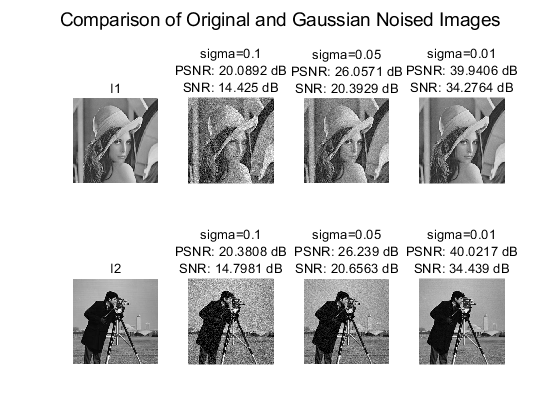

In [10]:
% 显示原图和加高斯噪声后的图像
figure;

% 调整字体大小
font_size = 10;

% I1 图像及其高斯噪声图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_I1{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_I1{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_I1{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% I2 图像及其高斯噪声图像
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_I2{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_I2{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_I2{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Comparison of Original and Gaussian Noised Images', 'FontSize', 14);

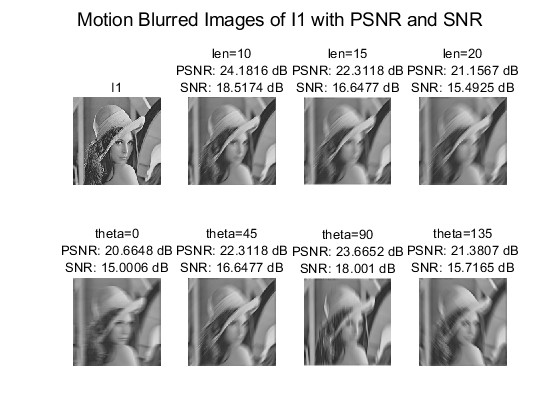

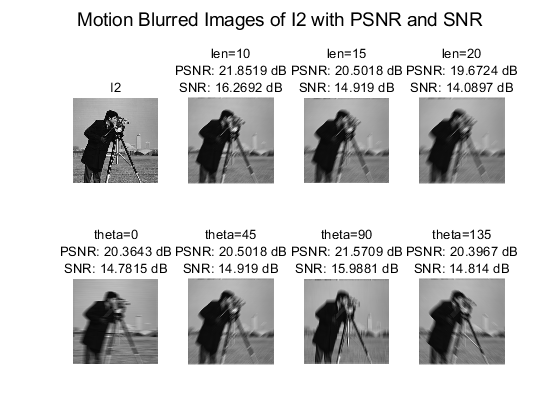

In [13]:


% 显示原图和加运动模糊的 I1 图像
figure;

% 调整字体大小
font_size = 10;

% 显示原始图像和运动模糊图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I1_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I1_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I1_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I1_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I1_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I1_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I1_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I1_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I1_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I1_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Motion Blurred Images of I1 with PSNR and SNR', 'FontSize', 14);

% 显示原图和加运动模糊的 I2 图像
figure;

% 调整字体大小
font_size = 10;

% 显示原始图像和运动模糊图像
subplot(2,4,1), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I2_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I2_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I2_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I2_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I2_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I2_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I2_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I2_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I2_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I2_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Motion Blurred Images of I2 with PSNR and SNR', 'FontSize', 14);

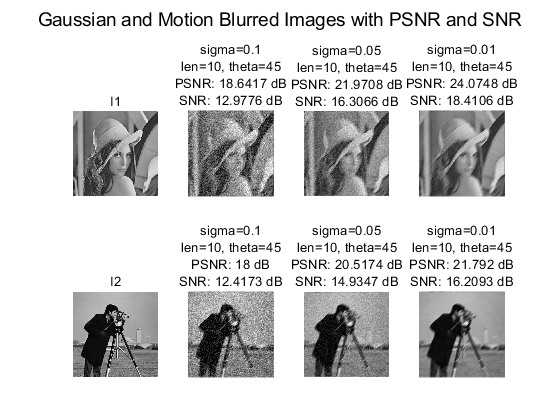

In [16]:
% 显示原图和加高斯噪声及运动模糊的图像
figure;

% 调整字体大小
font_size = 10;

% I1 图像及其高斯噪声 + 运动模糊图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_motion_I1{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...  % len 和 theta 在同一行
    ['PSNR: ', num2str(gaussian_motion_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_motion_I1{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_motion_I1{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% I2 图像及其高斯噪声 + 运动模糊图像
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_motion_I2{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_motion_I2{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_motion_I2{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Gaussian and Motion Blurred Images with PSNR and SNR', 'FontSize', 14);

1. Implement of the filters
We will first implement the inverse filter and Wiener filter. The result will be compared with those from the built-in functions provided by Python/Matlab/Octave.


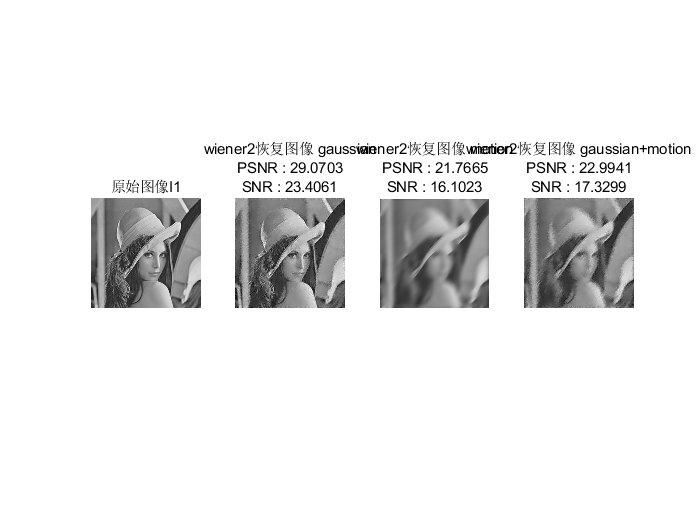

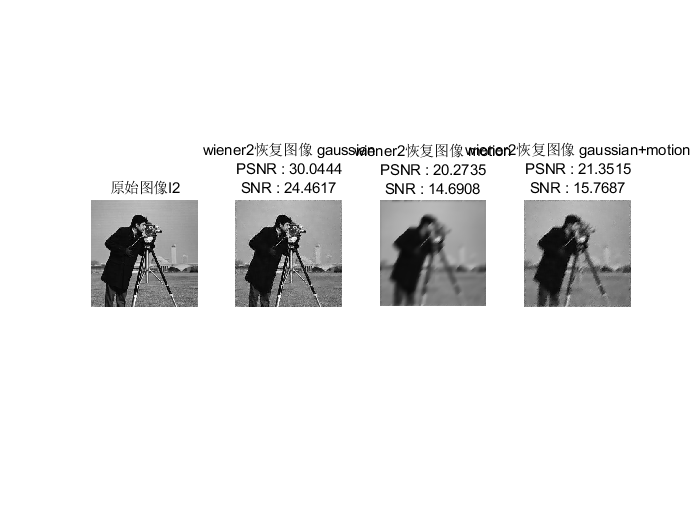

In [43]:
% The results of the inverse filter and Wiener filter can be added here
% Using built-in functions in Matlab

% 维纳滤波 wiener2 I1
% 显示结果
figure;
subplot(1, 4, 1); imshow(I1); title('原始图像I1');
% subplot(2, 3, 2); imshow(gaussian_I1{2}); title({'退化图像', ['PSNR : ', num2str(gaussian_I1_snr(2, 1))], ['SNR : ', num2str(gaussian_I1_snr(2, 2))]});

restore_img_I1 = wiener2(gaussian_I1{2}, [filter_size(i), filter_size(i)], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({'wiener2恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener2(motion_I1_len{2}, [filter_size(i), filter_size(i)]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({'wiener2恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener2(gaussian_motion_I1{2}, [filter_size(i), filter_size(i)], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({'wiener2恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

% 维纳滤波 wiener2 I2
% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('原始图像I2');
% subplot(2, 3, 2); imshow(gaussian_I2{2}); title({'退化图像', ['PSNR : ', num2str(gaussian_I2_snr(2, 1))], ['SNR : ', num2str(gaussian_I2_snr(2, 2))]});

restore_img_I2 = wiener2(gaussian_I2{2}, [filter_size(i), filter_size(i)], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({'wiener2恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener2(motion_I2_len{2}, [filter_size(i), filter_size(i)]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({'wiener2恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener2(gaussian_motion_I2{2}, [filter_size(i), filter_size(i)], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({'wiener2恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

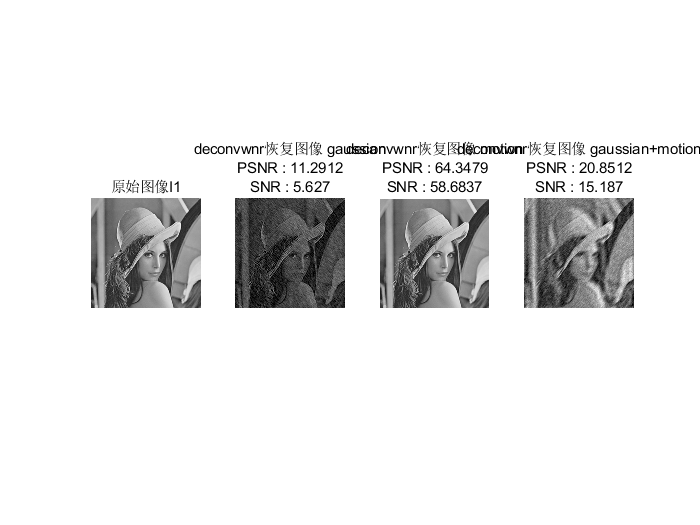

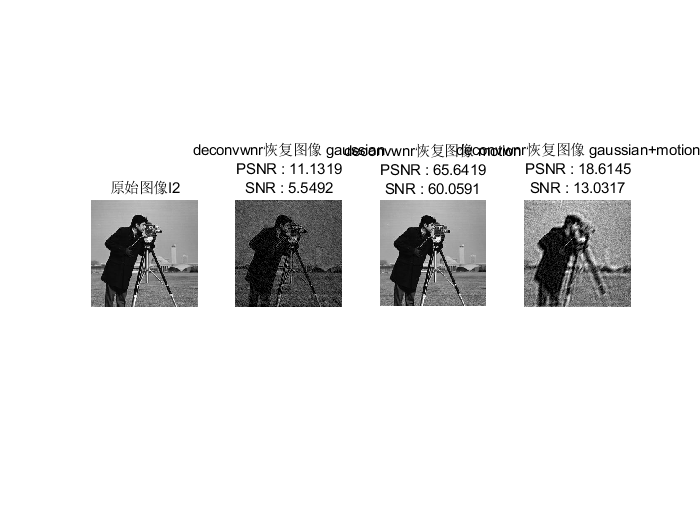

In [4]:
% 维纳滤波 deconvwnr I1
signal_var = var(I1(:));
NSR = gaussian_power(2) / signal_var;
% 显示结果
figure;
subplot(1, 4, 1); imshow(I1); title('原始图像I1');

restore_img_I1 = deconvwnr(gaussian_I1{2}, eye(2), NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({'deconvwnr恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = deconvwnr(motion_I1_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({'deconvwnr恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = deconvwnr(gaussian_motion_I1{2}, h_motions_len{2}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({'deconvwnr恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

% 维纳滤波 deconvwnr I2
signal_var = var(I2(:));
NSR = gaussian_power(2) / signal_var;
% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('原始图像I2');

restore_img_I2 = deconvwnr(gaussian_I2{2}, eye(2), NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({'deconvwnr恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = deconvwnr(motion_I2_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({'deconvwnr恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = deconvwnr(gaussian_motion_I2{2}, h_motions_len{2}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({'deconvwnr恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

2. Gaussian noise
We will use different filters, including median filters, mean filters, Gaussian filters, bilateral filters, inverse filters and Wiener filters to try to remove the noise. For each filter we will apply different window sizes and compare their results. For the result, we will use PSNR to measure the restoration quality. And we will discuss the result also based on the grayscale histogram and spectrum. 


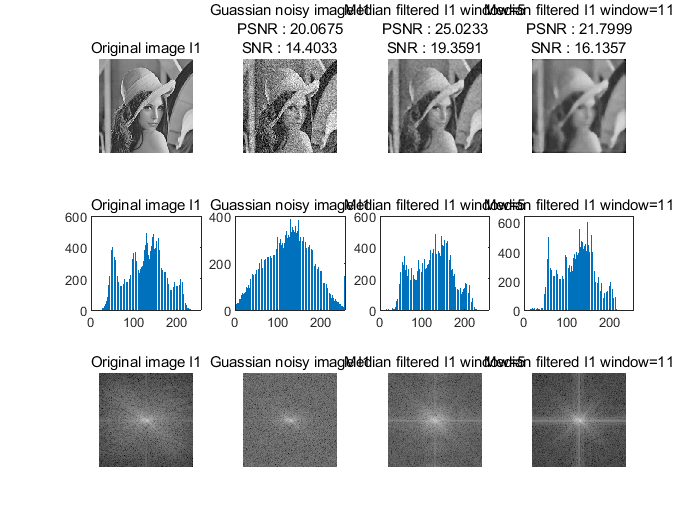

In [10]:
window_size = [5, 11];

% Median filters
median_I1 = cell(length(window_size));
median_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    median_I1{i} = medfilt2(gaussian_I1{1}, [window_size(i), window_size(i)]);
    [median_snr(i, 1), median_snr(i, 2)] = psnr(median_I1{i}, I1);
end

% Show the results of median filters
figure;
subplot(3, 4, 1); imshow(I1); title("Original image I1");
subplot(3, 4, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 4, 3); imshow(median_I1{1}); title({"Median filtered I1 window=5", ['PSNR : ', num2str(median_snr(1, 1))], ['SNR : ', num2str(median_snr(1, 2))]});
subplot(3, 4, 4); imshow(median_I1{2}); title({"Median filtered I1 window=11", ['PSNR : ', num2str(median_snr(2, 1))], ['SNR : ', num2str(median_snr(2, 2))]});
subplot(3, 4, 5); bar(imhist(I1)); title("Original image I1");
subplot(3, 4, 6); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 4, 7); bar(imhist(median_I1{1})); title("Median filtered I1 window=5");
subplot(3, 4, 8); bar(imhist(median_I1{2})); title("Median filtered I1 window=11");
subplot(3, 4, 9); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 4, 10); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 4, 11); imshow(to_frequency(median_I1{1}), []); title("Median filtered I1 window=5");
subplot(3, 4, 12); imshow(to_frequency(median_I1{2}), []); title("Median filtered I1 window=11");

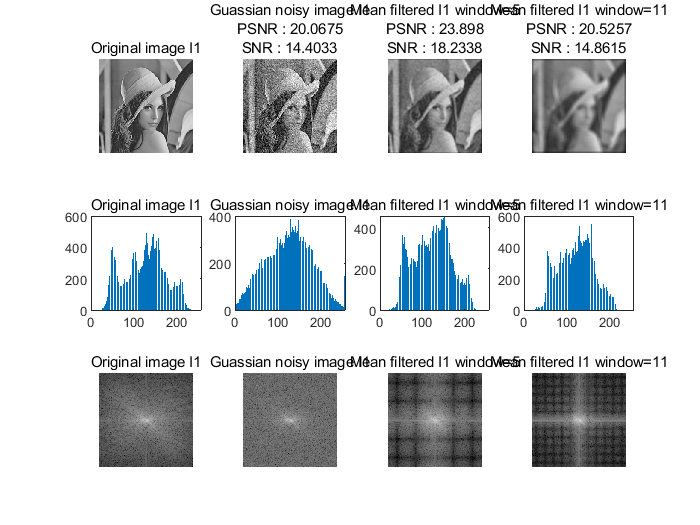

In [16]:
% mean filters
mean_I1 = cell(length(window_size));
mean_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    mean_I1{i} = imfilter(gaussian_I1{1}, fspecial("average", window_size(i)));
    [mean_snr(i, 1), mean_snr(i, 2)] = psnr(mean_I1{i}, I1);
end

% Show the results of mean filters
figure;
subplot(3, 4, 1); imshow(I1); title("Original image I1");
subplot(3, 4, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 4, 3); imshow(mean_I1{1}); title({"Mean filtered I1 window=5", ['PSNR : ', num2str(mean_snr(1, 1))], ['SNR : ', num2str(mean_snr(1, 2))]});
subplot(3, 4, 4); imshow(mean_I1{2}); title({"Mean filtered I1 window=11", ['PSNR : ', num2str(mean_snr(2, 1))], ['SNR : ', num2str(mean_snr(2, 2))]});
subplot(3, 4, 5); bar(imhist(I1)); title("Original image I1");
subplot(3, 4, 6); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 4, 7); bar(imhist(mean_I1{1})); title("Mean filtered I1 window=5");
subplot(3, 4, 8); bar(imhist(mean_I1{2})); title("Mean filtered I1 window=11");
subplot(3, 4, 9); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 4, 10); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 4, 11); imshow(to_frequency(mean_I1{1}), []); title("Mean filtered I1 window=5");
subplot(3, 4, 12); imshow(to_frequency(mean_I1{2}), []); title("Mean filtered I1 window=11");

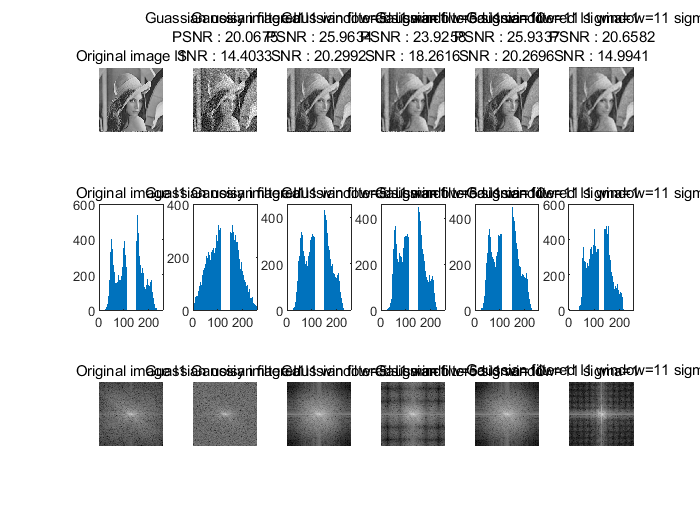

In [19]:
% Gaussian filters
sigma = [1, 10];
gau_filtered_len = length(window_size) * length(sigma);
gaussian_filtered_I1 = cell(gau_filtered_len);
gaussian_filtered_snr = zeros(gau_filtered_len, 2);
for i = 1:length(window_size)
    for j = 1:length(sigma)
        index = (i-1) * length(sigma) + j;
        gaussian_filtered_I1{index} = imfilter(gaussian_I1{1}, fspecial("gaussian", window_size(i), sigma(j)));
        [gaussian_filtered_snr(index, 1), gaussian_filtered_snr(index, 2)] = psnr(gaussian_filtered_I1{index}, I1);
    end
end

% Show the results of gaussian filters
figure;
subplot(3, 6, 1); imshow(I1); title("Original image I1");
subplot(3, 6, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 6, 3); imshow(gaussian_filtered_I1{1}); title({"Gaussian filtered I1 window=5 sigma=1", ['PSNR : ', num2str(gaussian_filtered_snr(1, 1))], ['SNR : ', num2str(gaussian_filtered_snr(1, 2))]});
subplot(3, 6, 4); imshow(gaussian_filtered_I1{2}); title({"Gaussian filtered I1 window=5 sigma=10", ['PSNR : ', num2str(gaussian_filtered_snr(2, 1))], ['SNR : ', num2str(gaussian_filtered_snr(2, 2))]});
subplot(3, 6, 5); imshow(gaussian_filtered_I1{1}); title({"Gaussian filtered I1 window=11 sigma=1", ['PSNR : ', num2str(gaussian_filtered_snr(3, 1))], ['SNR : ', num2str(gaussian_filtered_snr(3, 2))]});
subplot(3, 6, 6); imshow(gaussian_filtered_I1{2}); title({"Gaussian filtered I1 window=11 sigma=10", ['PSNR : ', num2str(gaussian_filtered_snr(4, 1))], ['SNR : ', num2str(gaussian_filtered_snr(4, 2))]});
subplot(3, 6, 7); bar(imhist(I1)); title("Original image I1");
subplot(3, 6, 8); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 6, 9); bar(imhist(gaussian_filtered_I1{1})); title("Gaussian filtered I1 window=5 sigma=1");
subplot(3, 6, 10); bar(imhist(gaussian_filtered_I1{2})); title("Gaussian filtered I1 window=5 sigma=10");
subplot(3, 6, 11); bar(imhist(gaussian_filtered_I1{3})); title("Gaussian filtered I1 window=11 sigma=1");
subplot(3, 6, 12); bar(imhist(gaussian_filtered_I1{4})); title("Gaussian filtered I1 window=11 sigma=10");
subplot(3, 6, 13); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 6, 14); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 6, 15); imshow(to_frequency(gaussian_filtered_I1{1}), []); title("Gaussian filtered I1 window=5 sigma=1");
subplot(3, 6, 16); imshow(to_frequency(gaussian_filtered_I1{2}), []); title("Gaussian filtered I1 window=5 sigma=10");
subplot(3, 6, 17); imshow(to_frequency(gaussian_filtered_I1{3}), []); title("Gaussian filtered I1 window=11 sigma=1");
subplot(3, 6, 18); imshow(to_frequency(gaussian_filtered_I1{4}), []); title("Gaussian filtered I1 window=11 sigma=10");

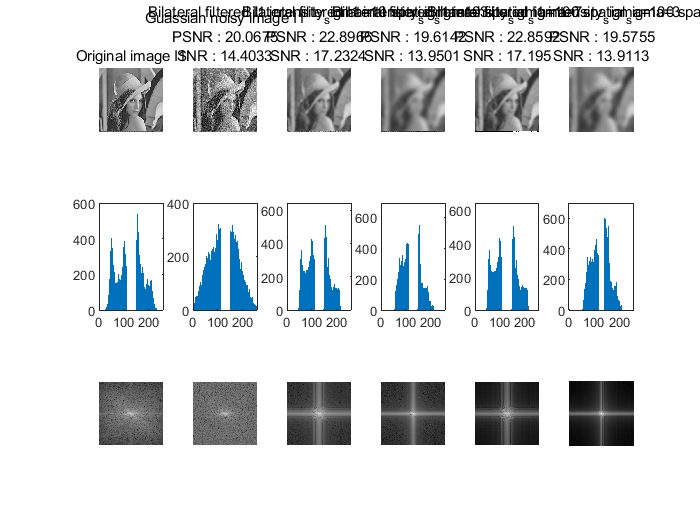

In [28]:
% Bilateral filters
intensity_sigma = [10, 100];
spatial_sigma = [3, 7];
bil_filtered_len = length(intensity_sigma) * length(spatial_sigma);
bil_filtered_I1 = cell(bil_filtered_len);
bil_filtered_snr = zeros(bil_filtered_len, 2);
for i = 1:length(intensity_sigma)
    for j = 1:length(spatial_sigma)
        index = (i-1) * length(spatial_sigma) + j;
        bil_filtered_I1{index} = imbilatfilt(gaussian_I1{1}, intensity_sigma(i), spatial_sigma(j));
        [bil_filtered_snr(index, 1), bil_filtered_snr(index, 2)] = psnr(bil_filtered_I1{index}, I1);
    end
end

% Show the results of bilateral filters
figure;
subplot(3, 6, 1); imshow(I1); title("Original image I1");
subplot(3, 6, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 6, 3); imshow(bil_filtered_I1{1}); title({"Bilateral filtered I1 intensity_sigma=10 spatial_sigma=3", ['PSNR : ', num2str(bil_filtered_snr(1, 1))], ['SNR : ', num2str(bil_filtered_snr(1, 2))]});
subplot(3, 6, 4); imshow(bil_filtered_I1{2}); title({"Bilateral filtered I1 intensity_sigma=10 spatial_sigma=7", ['PSNR : ', num2str(bil_filtered_snr(2, 1))], ['SNR : ', num2str(bil_filtered_snr(2, 2))]});
subplot(3, 6, 5); imshow(bil_filtered_I1{1}); title({"Bilateral filtered I1 intensity_sigma=100 spatial_sigma=3", ['PSNR : ', num2str(bil_filtered_snr(3, 1))], ['SNR : ', num2str(bil_filtered_snr(3, 2))]});
subplot(3, 6, 6); imshow(bil_filtered_I1{2}); title({"Bilateral filtered I1 intensity_sigma=100 spatial_sigma=7", ['PSNR : ', num2str(bil_filtered_snr(4, 1))], ['SNR : ', num2str(bil_filtered_snr(4, 2))]});
subplot(3, 6, 7); bar(imhist(I1));
subplot(3, 6, 8); bar(imhist(gaussian_I1{1}));
subplot(3, 6, 9); bar(imhist(bil_filtered_I1{1}));
subplot(3, 6, 10); bar(imhist(bil_filtered_I1{2}));
subplot(3, 6, 11); bar(imhist(bil_filtered_I1{3}));
subplot(3, 6, 12); bar(imhist(bil_filtered_I1{4}));
subplot(3, 6, 13); imshow(to_frequency(I1), []);
subplot(3, 6, 14); imshow(to_frequency(gaussian_I1{1}), []);
subplot(3, 6, 15); imshow(to_frequency(bil_filtered_I1{1}), []);
subplot(3, 6, 16); imshow(to_frequency(bil_filtered_I1{2}), []);
subplot(3, 6, 17); imshow(to_frequency(bil_filtered_I1{3}), []);
subplot(3, 6, 18); imshow(to_frequency(bil_filtered_I1{4}), []);

In [ ]:
% inverse filters

% Wiener filters


# 3. Motion blur and Restoration Using Inverse Filter
We will use inverse filters to try to restore the images. We will use the same method as above to assess the result.


## 3.1 Test Inverse Filter Using I1
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

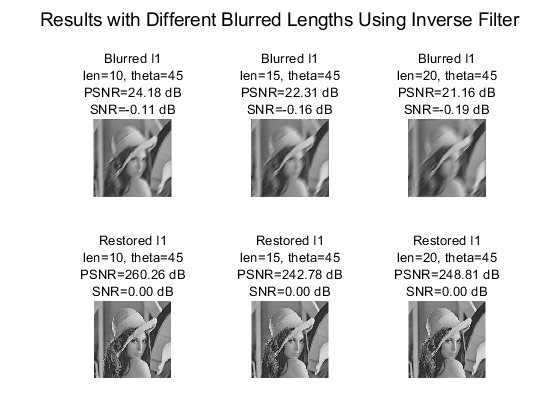

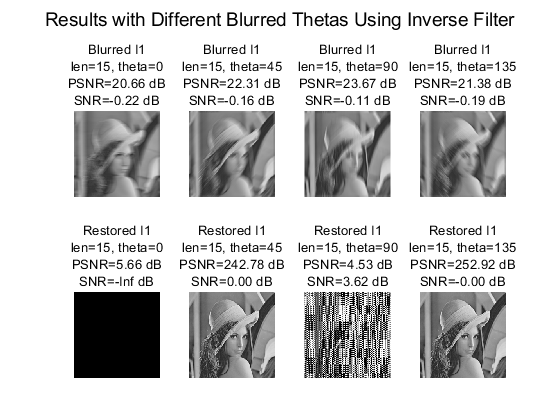

In [ ]:
%% Test Inverse Filter using I1 (different lens and thetas)
% 1. Different lens, with a fixed theta = 45
restored_I1_len = cell(length(motion_len), 1);
psnr_values_restored = zeros(length(motion_len), 1);  % PSNR
snr_values_restored = zeros(length(motion_len), 1);   % SNR
for i = 1:length(motion_len)
    restored_I1_len{i} = inverse_filter(h_motions_len{i}, motion_I1_len{i});
    psnr_values_restored(i) = psnr(restored_I1_len{i}, I1);  % PSNR
    snr_values_restored(i) = snr(restored_I1_len{i}, I1);    % SNR
end

figure;
for i = 1:length(motion_len)
    subplot(2, length(motion_len), i);
    imshow(motion_I1_len{i});
    title({['Blurred I1'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr(motion_I1_len{i}, I1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr(motion_I1_len{i}, I1), '%.2f'), ' dB']}, 'FontSize', 10);
end
for i = 1:length(motion_len)
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I1_len{i});
    title({['Restored I1'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr_values_restored(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored(i), '%.2f'), ' dB']}, 'FontSize', 10);
end
sgtitle('Results with Different Blurred Lengths Using Inverse Filter', 'FontSize', 14);




% 2. Different thetas, with a fixed len = 15
for j = 1:length(motion_theta)
    restored_I1_theta{j} = inverse_filter(h_motions_theta{j}, motion_I1_theta{j});
    restored_I1_theta{j} = im2double(restored_I1_theta{j});
    restored_I1_theta{j}(~isfinite(restored_I1_theta{j})) = 0;
    psnr_values_restored(j) = psnr(restored_I1_theta{j}, I1);  
    snr_values_restored(j) = snr(restored_I1_theta{j}, I1);    
end

figure;
% Blurred with different theta and restored
subplot_idx = 1;
for j = 1:length(motion_theta)
    subplot(2, length(motion_theta), subplot_idx);
    imshow(motion_I1_theta{j});
    title({['Blurred I1'], ['len=15, theta=', num2str(motion_theta(j))], ...
           ['PSNR=', num2str(psnr(motion_I1_theta{j}, I1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr(motion_I1_theta{j}, I1), '%.2f'), ' dB']}, 'FontSize', 10);
    subplot_idx = subplot_idx + 1;
end
for j = 1:length(motion_theta)
    subplot(2, length(motion_theta), subplot_idx);
    imshow(restored_I1_theta{j});
    title({['Restored I1'], ['len=15, theta=', num2str(motion_theta(j))], ...
           ['PSNR=', num2str(psnr_values_restored(j), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored(j), '%.2f'), ' dB']}, 'FontSize', 10);
    subplot_idx = subplot_idx + 1;
end
sgtitle('Results with Different Blurred Thetas Using Inverse Filter', 'FontSize', 14);

## 3.2 Test Inverse Filter Using I2
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

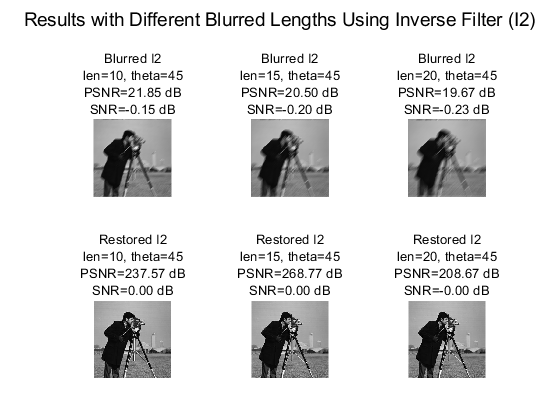

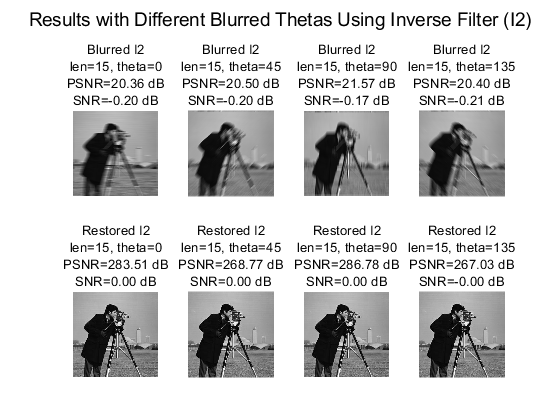

In [ ]:
%% Test Inverse Filter using I2 (different lens and thetas)

% 1. Different lens, with a fixed theta = 45
restored_I2_len = cell(length(motion_len), 1);
psnr_values_restored = zeros(length(motion_len), 1);  % PSNR
snr_values_restored = zeros(length(motion_len), 1);   % SNR
for i = 1:length(motion_len)
    restored_I2_len{i} = inverse_filter(h_motions_len{i}, motion_I2_len{i});
    psnr_values_restored(i) = psnr(restored_I2_len{i}, I2);  % PSNR
    snr_values_restored(i) = snr(restored_I2_len{i}, I2);    % SNR
end

figure;
for i = 1:length(motion_len)
    subplot(2, length(motion_len), i);
    imshow(motion_I2_len{i});
    title({['Blurred I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr(motion_I2_len{i}, I2), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr(motion_I2_len{i}, I2), '%.2f'), ' dB']}, 'FontSize', 10);
end
for i = 1:length(motion_len)
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I2_len{i});
    title({['Restored I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr_values_restored(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored(i), '%.2f'), ' dB']}, 'FontSize', 10);
end
sgtitle('Results with Different Blurred Lengths Using Inverse Filter (I2)', 'FontSize', 14);


% 2. Different thetas, with a fixed len = 15
for j = 1:length(motion_theta)
    restored_I2_theta{j} = inverse_filter(h_motions_theta{j}, motion_I2_theta{j});
    restored_I2_theta{j} = im2double(restored_I2_theta{j});
    restored_I2_theta{j}(~isfinite(restored_I2_theta{j})) = 0;
    psnr_values_restored(j) = psnr(restored_I2_theta{j}, I2);  
    snr_values_restored(j) = snr(restored_I2_theta{j}, I2);    
end

figure;
% Blurred with different theta and restored
subplot_idx = 1;
for j = 1:length(motion_theta)
    subplot(2, length(motion_theta), subplot_idx);
    imshow(motion_I2_theta{j});
    title({['Blurred I2'], ['len=15, theta=', num2str(motion_theta(j))], ...
           ['PSNR=', num2str(psnr(motion_I2_theta{j}, I2), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr(motion_I2_theta{j}, I2), '%.2f'), ' dB']}, 'FontSize', 10);
    subplot_idx = subplot_idx + 1;
end
for j = 1:length(motion_theta)
    subplot(2, length(motion_theta), subplot_idx);
    imshow(restored_I2_theta{j});
    title({['Restored I2'], ['len=15, theta=', num2str(motion_theta(j))], ...
           ['PSNR=', num2str(psnr_values_restored(j), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored(j), '%.2f'), ' dB']}, 'FontSize', 10);
    subplot_idx = subplot_idx + 1;
end
sgtitle('Results with Different Blurred Thetas Using Inverse Filter (I2)', 'FontSize', 14);

# 4. Motion blur + Gaussian noise
We will use inverse filters and Wiener filters to try to restore the images. We will use the same method as above to assess the result.


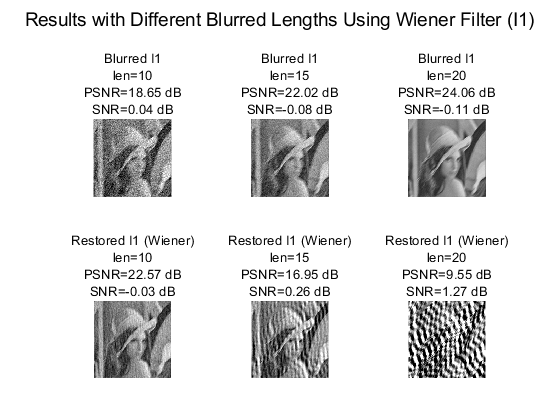

In [ ]:
restored_I1_len = cell(length(motion_len), 1);         % 用于存储恢复后的图像
psnr_values_restored = zeros(length(motion_len), 1);   % 用于存储恢复后图像的 PSNR
snr_values_restored = zeros(length(motion_len), 1);    % 用于存储恢复后图像的 SNR

% 对不同的模糊长度进行 Wiener 滤波恢复
for i = 1:length(motion_len)
    % 提取高斯噪声分量：噪声图像减去原始图像
    noise_component = gaussian_I1{i} - I1;
    
    % 使用 wiener_filter 恢复图像，将噪声分量传递给第三个参数
    restored_I1_len{i} = wiener_filter(gaussian_motion_I1{i}, I1, noise_component, h_motions_len{i});
    
    % 计算 PSNR 和 SNR
    psnr_values_restored(i) = psnr(restored_I1_len{i}, I1);  % 计算恢复图像的 PSNR
    snr_values_restored(i) = snr(restored_I1_len{i}, I1);    % 计算恢复图像的 SNR
end

% 绘制图像进行对比
figure;
for i = 1:length(motion_len)
    % 绘制添加高斯噪声的模糊图像
    subplot(2, length(motion_len), i);
    imshow(gaussian_motion_I1{i});
    title({['Blurred I1'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr(gaussian_motion_I1{i}, I1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr(gaussian_motion_I1{i}, I1), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_len)
    % 绘制恢复后的图像
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I1_len{i});
    title({['Restored I1 (Wiener)'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr_values_restored(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加总标题
sgtitle('Results with Different Blurred Lengths Using Wiener Filter (I1)', 'FontSize', 14);

5. State-of-the-art algorithms
We will use the state-of-the-art algorithms to restore the images, comparing the result with those generated previously, and discuss why the state-of-the-art algorithms perform better.
